#### Wage Analysis Across States and Demographics
- Spring 2025
- by Nicholas Nemkov

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px

Load in the Datasets

In [2]:
adult_df = pd.read_csv('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/adult.data', header=None, na_values=" ?")

adult_df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                      "marital-status", "occupation", "relationship", "race", "sex",
                      "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

In [3]:
state_wage_stats = pd.read_excel('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/state_M2023_dl.xlsx')

In [4]:
population = pd.read_csv('C:/Users/nickn/OneDrive/Desktop/Capstone Project/capstone/data/NST-EST2023-ALLDATA.csv')

In [5]:
# deal with NA values for adult.data
adult_df.dropna(inplace=True)
print(adult_df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [6]:
print(state_wage_stats.isna().sum())

AREA                0
AREA_TITLE          0
AREA_TYPE           0
PRIM_STATE          0
NAICS               0
NAICS_TITLE         0
I_GROUP             0
OWN_CODE            0
OCC_CODE            0
OCC_TITLE           0
O_GROUP             0
TOT_EMP             0
EMP_PRSE            0
JOBS_1000           0
LOC_QUOTIENT        0
PCT_TOTAL       37676
PCT_RPT         37676
H_MEAN              0
A_MEAN              0
MEAN_PRSE           0
H_PCT10             0
H_PCT25             0
H_MEDIAN            0
H_PCT75             0
H_PCT90             0
A_PCT10             0
A_PCT25             0
A_MEDIAN            0
A_PCT75             0
A_PCT90             0
ANNUAL          35034
HOURLY          37517
dtype: int64


### Question 1

- Is a job more demanding based on the higher level of education and the age of the person?
- Does the income level of a job determine how hard a person has to work?

In [7]:
# visualize levels of education
adult_df[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                9840
Some-college  10               6678
Bachelors     13               5044
Masters       14               1627
Assoc-voc     11               1307
11th          7                1048
Assoc-acdm    12               1008
10th          6                 820
7th-8th       4                 557
Prof-school   15                542
9th           5                 455
12th          8                 377
Doctorate     16                375
5th-6th       3                 288
1st-4th       2                 151
Preschool     1                  45
Name: count, dtype: int64

In [8]:
# organize lists for education categories
preschool = [1]
primary = [2, 3]
secondary = [4, 5, 6, 7, 8, 9]
higher = [10, 11, 12, 13, 14, 15, 16]

def get_categories(number):
    '''
    Check if a numerical category is part of the 4 education groups.
    '''
    if number in preschool:
        return "Preschool"
    elif number in primary:
        return "Primary"
    elif number in secondary:
        return "Secondary"
    else:
        return "Higher"

# use get_categories function to create a new column with education categories
adult_df['education_category'] = adult_df['education-num'].apply(get_categories)
    

In [9]:
# create a decade column for easier viewing of the age
adult_df["age_decade"] = ((adult_df["age"]) // 10) * 10
mean_hours = adult_df.groupby(["age_decade", "education_category"])["hours-per-week"].mean().reset_index()

# drop Preschool category if needed
drop_preschool = mean_hours[mean_hours['education_category'] != 'Preschool']

# Create line plot using Plotly Express
fig = px.line(drop_preschool, x="age_decade", y="hours-per-week", color="education_category",
              title="<b>Mean Hours Worked Per Week Against Employee Age</b>",
              labels={"age_decade": "Age", "hours-per-week": "Mean Hours Per Week", "education_category": "Education Level"},
              markers=True)

fig.update_layout(
    font=dict(
        color='black'
    ))

fig.show()

In [10]:
# boxplot of weekly hours worked against salary category
fig = px.box(adult_df, x="salary", y="hours-per-week", color="education_category", 
             labels={
                     "education_category": "Education Level",
                     "salary": "Salary Category",
                     "hours-per-week": "Hours Worked per Week"
                 },
             title="Weekly Hours Against Salary Category")
fig.show()

### Question 2

Is there a noticable trend between a person’s salary and their sex? What about their
race?

In [ ]:
# Q2 Part 1)

# calculate total count of salary category by sex
counts = adult_df.groupby(['sex', 'salary']).size().reset_index(name='count')

# stacked bar chart
fig_2a = px.bar(counts, x='sex', y='count', color='salary',
                title="<b>Salary Levels Between Females and Males</b>")


# include black font for title
fig_2a.update_layout(
    font=dict(
        color='black'
    ))

fig_2a.show()

In [21]:
# 100% filled bar chart

# calculate percent of total sex occurences that belong to a salary category
counts['percentage'] = counts.groupby('sex')['count'].transform(lambda x: (x / sum(x)) * 100)

# plot filled bar chart
fig_2b = px.bar(counts, x='sex', y='percentage', color='salary',
                title="<b>Pecentage of Salary Levels Between Females and Males</b>")

fig_2b.update_layout(
    font=dict(
        color='black'
    ))

fig_2b.show()

In [22]:
# race occurences
race_counts = adult_df.groupby(['race', 'salary']).size().reset_index(name='count')
race_counts['percentage'] = race_counts.groupby('race')['count'].transform(lambda x: (x / sum(x)) * 100)

fig_2c = px.bar(race_counts, x='race', y='count', color='salary',
                title="<b>Salary Levels Between Races</b>")

fig_2c.update_layout(
    font=dict(
        color='black'
    ))

fig_2c.show()

fig_2d = px.bar(race_counts, x='race', y='percentage', color='salary',
                title="<b>Percentage of Salary Levels Between Races</b>")

fig_2d.update_layout(
    font=dict(
        color='black'
    ))

fig_2d.show()

Question 3:

In [23]:
# machine learning import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
# prepare adult_df data for regression

# split to features and target
features = adult_df.drop("salary", axis=1)
target = adult_df["salary"]

# one-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)

In [10]:
# split data 70/30 train/test
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [11]:
# standardize numerical features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [12]:
# fit model
model = LogisticRegression()
model.fit(features_train, target_train)

LogisticRegression()

In [13]:
predictions = model.predict(features_test)

print("Accuracy:\n", accuracy_score(predictions, target_test))

print("")

print("Classification Report:\n", classification_report(target_test, predictions))

Accuracy:
 0.8508122444469002

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6767
        >50K       0.75      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049



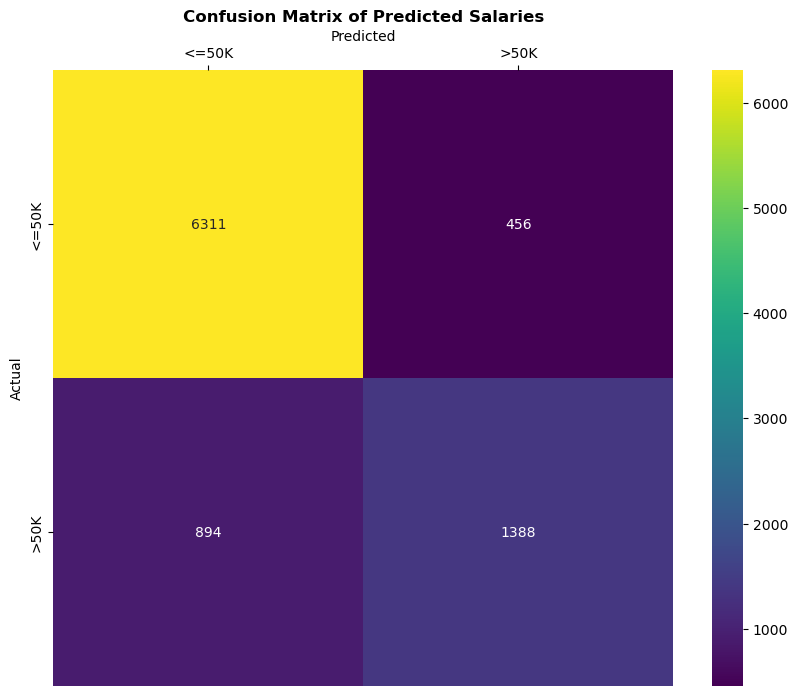

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(target_test, predictions)

labels = ["<=50K", ">50K"]

plt.figure(figsize=(10, 8))

matrix = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=sns.color_palette("viridis", as_cmap=True), xticklabels=labels, yticklabels=labels)

matrix.xaxis.set_ticks_position("top")  # Move x-axis to top
matrix.xaxis.set_label_position("top")  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Predicted Salaries", weight='bold')

plt.show()

In [15]:
# Feature importance (absolute values)
feature_importance = np.abs(model.coef_[0])

importance_df = pd.DataFrame({"Feature": features.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [16]:
# combine one-hot encoded features into the original feature
importance_df["Original Feature"] = importance_df["Feature"].str.split("_").str[0]
aggregated_importance = importance_df.groupby("Original Feature")["Importance"].sum()
aggregated_importance = aggregated_importance.sort_values(ascending=False)

In [103]:
# feature importance bar plot
top_5 = aggregated_importance[:6].sort_values(ascending=False).reset_index()
top_5.columns = ['Original Feature', 'Value']

# Create the bar plot
fig = px.bar(
    top_5,
    x='Value',
    y='Original Feature',
    orientation='h',
    title="<b>Absolute Feature Importances</b>",
    labels={
        "Original Feature": "Absolute Feature",
        "Value": "Coefficient Value"
    },
    category_orders={
        "Original Feature": top_5['Original Feature'].tolist()
    }
)

# fig.update_layout(
#     plot_bgcolor='white',   # Background of the plot area
#     paper_bgcolor='lightgray',   # Background outside the plot area
#     font=dict(
#         color='black'
#     )
# )

fig.show()

Question 4:

Which US state has the greatest average annual wage and hourly wage?

In [11]:
# filter state_wage_stats to only have rows with 'All Occupations' and contain US states
filt_state_df = state_wage_stats[state_wage_stats['OCC_TITLE'].str.contains('All Occupations', case=False, na=False)]
us_filt_state = filt_state_df[filt_state_df['AREA_TYPE'] == 2]

In [12]:
us_filt_state['A_MEAN'] = pd.to_numeric(us_filt_state['A_MEAN'])
us_filt_state['H_MEAN'] = pd.to_numeric(us_filt_state['H_MEAN'])

C:\Users\nickn\AppData\Local\Temp\ipykernel_16136\1939442581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt_state['A_MEAN'] = pd.to_numeric(us_filt_state['A_MEAN'])
C:\Users\nickn\AppData\Local\Temp\ipykernel_16136\1939442581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt_state['H_MEAN'] = pd.to_numeric(us_filt_state['H_MEAN'])


In [13]:
# Bar plot of top 10 states with highest mean hourly and annual wages
top_10_states = us_filt_state[['AREA_TITLE', 'A_MEAN', 'H_MEAN']].sort_values(by="A_MEAN", ascending=False).head(10)

In [14]:
us_filt = state_wage_stats[state_wage_stats['AREA_TYPE'] == 2]


us_filt['A_MEAN'] = pd.to_numeric(us_filt['A_MEAN'], errors="coerce")
us_filt['H_MEAN'] = pd.to_numeric(us_filt['H_MEAN'], errors="coerce")
top_10_prof = us_filt[['AREA_TITLE', 'OCC_TITLE', 'A_MEAN', 'H_MEAN']].sort_values(by="A_MEAN", ascending=False).head(10)

C:\Users\nickn\AppData\Local\Temp\ipykernel_16136\1821889120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt['A_MEAN'] = pd.to_numeric(us_filt['A_MEAN'], errors="coerce")
C:\Users\nickn\AppData\Local\Temp\ipykernel_16136\1821889120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_filt['H_MEAN'] = pd.to_numeric(us_filt['H_MEAN'], errors="coerce")


In [15]:
fig_4a = px.bar(top_10_states, x='AREA_TITLE', y='H_MEAN',
                   #r='H_MEAN',  # Radius (wage value)
                   #theta='AREA_TITLE',  # Angle (categories)
                   #color='H_MEAN',  # Color based on wages
                   #color_continuous_scale='Blues',
                   title="Top 10 Mean Hourly Wages in the US",
                   labels={
                       'AREA_TITLE':'State',
                       'H_MEAN': 'Hourly Salary in USD'
                   })

# Show the figure
fig_4a.show()


fig_5b = px.bar(top_10_states, x='AREA_TITLE', y='A_MEAN',
                   #r='H_MEAN',  # Radius (wage value)
                   #theta='AREA_TITLE',  # Angle (categories)
                   #color='H_MEAN',  # Color based on wages
                   color_continuous_scale='viridis',
                   title="Top 10 Mean Annual Wages in the US",
                   labels={
                       'AREA_TITLE':'State',
                       'A_MEAN': 'Annual Salary in USD'
                   })

# Show the figure
fig_5b.show()

In [16]:
# for mean hourly wage
fig_4map_a = px.choropleth(
    us_filt_state,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="H_MEAN",  # Value to color by
    #hover_name="AREA_TITLE",  # Display state name on hover
    color_continuous_scale="Reds",  # Color scale
    scope="usa",  # Focus on the USA
    title="Mean Hourly Salary By State",
    labels={"H_MEAN":"Hourly Wage", 
            "PRIM_STATE":"State"}
)

fig_4map_a.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=800, 
                  height=500)

fig_4map_a.show()

# for mean annual wage
fig_4map_b = px.choropleth(
    us_filt_state,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="A_MEAN",  # Value to color by
    color_continuous_scale="Blues",
    scope="usa",
    title="Mean Annual Salary By State",
    labels={"A_MEAN":"Annual Wage", 
            "PRIM_STATE":"State"}
)

fig_4map_b.show()

Question 5

###### Do high employment levels indicate high salaries?
- Plot 1:
    - Normalized map plot of employment rates by state
- Plot 2:
    - Interactive bubble plot showing Total Employment vs. Salary.
        - size of bubble is the mdeian wage

In [17]:
# prep population dataset
state_population = population[population['SUMLEV'] == 40]
state_population = state_population[state_population['NAME'] != 'Puerto Rico']
state_population = state_population.rename(columns={'NAME': 'AREA_TITLE'})

In [18]:
pop_merge = pd.merge(us_filt_state, state_population, on='AREA_TITLE', how='left')

# create column with normalized employment rates
pop_merge['EMPLOYMENT_RATE'] = (pop_merge['TOT_EMP'] / pop_merge['POPESTIMATE2023'])
pop_merge['EMPLOYMENT_RATE'] = pd.to_numeric(pop_merge['EMPLOYMENT_RATE'])

pop_merge['EMPLOYMENT_RATE'] = pop_merge['EMPLOYMENT_RATE'].round(4)

In [19]:
pop_merge['EMPLOYMENT_RATE'].head()

0    0.4019
1    0.4249
2    0.4212
3    0.4144
4    0.4606
Name: EMPLOYMENT_RATE, dtype: float64

In [20]:
# plot 1
fig_5a = px.choropleth(
    pop_merge,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="EMPLOYMENT_RATE",
    color_continuous_scale="Viridis",
    scope="usa",
    title="Employment Rate By State",
    labels={"EMPLOYMENT_RATE":"Employment Rate", 
            "PRIM_STATE":"State"}
)

fig_5a.show()

In [21]:
# Create Bubble Chart
A_filtered = us_filt_state[['PRIM_STATE', 'TOT_EMP', 'A_MEAN', 'A_MEDIAN']].dropna()

A_filtered['TOT_EMP'] = pd.to_numeric(A_filtered['TOT_EMP'], errors='coerce')
A_filtered['A_MEAN'] = pd.to_numeric(A_filtered['A_MEAN'], errors='coerce')
A_filtered['A_MEDIAN'] = pd.to_numeric(A_filtered['A_MEDIAN'], errors='coerce')

fig5_b = px.scatter(A_filtered, 
                 x='TOT_EMP', 
                 y='A_MEAN', 
                 size='A_MEDIAN',  # Bubble size
                 hover_name='PRIM_STATE', 
                 title="US States Annual Wages vs. Total Employment",
                 labels={'TOT_EMP': 'Total Employment', 'A_MEDIAN': 'Annual Median Wage', 'A_MEAN': 'Annual Mean Wage'},
                 size_max=20,  # Limits the max bubble size
                 color='A_MEDIAN'  # Color gradient based on wages
                )   

fig5_b.show()

In [22]:
# Hourly wages
H_filtered = us_filt_state[['PRIM_STATE', 'TOT_EMP', 'H_MEAN', 'H_MEDIAN']].dropna()

H_filtered['TOT_EMP'] = pd.to_numeric(H_filtered['TOT_EMP'], errors='coerce')
H_filtered['H_MEAN'] = pd.to_numeric(H_filtered['H_MEAN'], errors='coerce')
H_filtered['H_MEDIAN'] = pd.to_numeric(H_filtered['H_MEDIAN'], errors='coerce')

fig5_c = px.scatter(H_filtered, 
                 x='TOT_EMP', 
                 y='H_MEAN', 
                 size='H_MEDIAN',  # Bubble size
                 hover_name='PRIM_STATE', 
                 title="US States Hourly Wages vs. Total Employment",
                 labels={'TOT_EMP': 'Total Employment', 'H_MEDIAN': 'Hourly Median Wage', 'H_MEAN': 'Hourly Mean Wage'},
                 size_max=20,
                 color='H_MEDIAN',
                 color_continuous_scale="Viridis"
                )   

fig5_c.show()

#### Question 6
- Which IT profession is most common across the US states?

In [23]:
print(state_wage_stats['OCC_TITLE'].value_counts())

OCC_TITLE
Stockers and Order Fillers                                54
Laborers and Freight, Stock, and Material Movers, Hand    54
Packers and Packagers, Hand                               54
Cleaners of Vehicles and Equipment                        54
Industrial Truck and Tractor Operators                    54
                                                          ..
Industrial-Organizational Psychologists                    2
Farm Labor Contractors                                     2
Cooks, Private Household                                   2
Patternmakers, Wood                                        2
Timing Device Assemblers and Adjusters                     1
Name: count, Length: 853, dtype: int64


In [129]:
filt_state = state_wage_stats[state_wage_stats['AREA_TYPE'] == 2]

it_fields = ['computer', 'data', 'programmer', 'software', 'cyber', 'network']
pattern = '|'.join(it_fields)

it_job = filt_state[filt_state['OCC_TITLE'].str.contains(pattern, case=False, na=False)]

# list of non-IT jobs
drop_jobs = ['Computer and Mathematical Occupations', 
             'Data Entry Keyers', 
             'Computer Occupations, All Other', 
             'Computer, Automated Teller, and Office Machine Repairers', 
             'Electronics Engineers, Except Computer', 
             'Office Machine Operators, Except Computer', 
             'Computer Numerically Controlled Tool Operators', 
             'Computer Hardware Engineers']

it_job = it_job[~it_job['OCC_TITLE'].isin(drop_jobs)]

In [130]:
it_job['OCC_TITLE'].value_counts()

OCC_TITLE
Computer and Information Systems Managers           51
Computer User Support Specialists                   51
Computer Network Support Specialists                51
Computer Network Architects                         51
Database Administrators                             51
Network and Computer Systems Administrators         51
Database Architects                                 51
Data Scientists                                     51
Software Developers                                 51
Computer Programmers                                51
Computer Systems Analysts                           50
Computer Science Teachers, Postsecondary            50
Software Quality Assurance Analysts and Testers     49
Computer Numerically Controlled Tool Programmers    45
Computer and Information Research Scientists        42
Name: count, dtype: int64

Difference between 90th percentile and median.

In [131]:
it_job['A_PCT90'] = pd.to_numeric(it_job['A_PCT90'], errors='coerce')
it_job['A_MEDIAN'] = pd.to_numeric(it_job['A_MEDIAN'], errors='coerce')

In [132]:
it_job['difference_90_med'] = it_job['A_PCT90'] - it_job['A_MEDIAN']

In [133]:
top5_per_state = (
    it_job
    .sort_values(['OCC_TITLE', 'PRIM_STATE', 'difference_90_med'], ascending=[False, True, False])
    .groupby('PRIM_STATE')
    .head(5)
)

In [137]:
print(top5_per_state[['PRIM_STATE', 'OCC_TITLE', 'difference_90_med']])

      PRIM_STATE                                        OCC_TITLE  \
814           AK  Software Quality Assurance Analysts and Testers   
79            AL  Software Quality Assurance Analysts and Testers   
1400          AZ  Software Quality Assurance Analysts and Testers   
2859          CA  Software Quality Assurance Analysts and Testers   
3691          CO  Software Quality Assurance Analysts and Testers   
...          ...                                              ...   
35405         WI                          Database Administrators   
34726         WV                          Database Administrators   
36169         WY                          Database Administrators   
2159          AR                                  Data Scientists   
36178         WY                                  Data Scientists   

       difference_90_med  
814              32180.0  
79               47980.0  
1400             42150.0  
2859             67330.0  
3691             41890.0  
...      

In [125]:
data_science = it_job[it_job['OCC_TITLE'] == 'Data Scientists']

##### Question 7
Nebraska, New York, and New Jersey Case Study

In [52]:
# filter data for only the three states
ny_nj_nb = ['NY', 'NJ', 'NE']
nynjnb_df = state_wage_stats[state_wage_stats['PRIM_STATE'].isin(ny_nj_nb)]
nynjnb_df = nynjnb_df[nynjnb_df['OCC_TITLE'] != 'All Occupations']
nynjnb_df = nynjnb_df[nynjnb_df['JOBS_1000'] != '**']
nynjnb_df['JOBS_1000'] = nynjnb_df['JOBS_1000'].astype(int)

In [54]:
top5_jobs_per_state = (
    nynjnb_df
    .sort_values(['PRIM_STATE', 'JOBS_1000'], ascending=[True, False])
    .groupby('PRIM_STATE')
    .head(5)
)

In [55]:
print(top5_jobs_per_state[['PRIM_STATE', 'OCC_TITLE', 'JOBS_1000']])

      PRIM_STATE                                         OCC_TITLE  JOBS_1000
19843         NE     Office and Administrative Support Occupations        121
20069         NE    Transportation and Material Moving Occupations         92
19823         NE                     Sales and Related Occupations         88
19774         NE  Food Preparation and Serving Related Occupations         85
19409         NE                            Management Occupations         72
21951         NJ     Office and Administrative Support Occupations        131
22197         NJ    Transportation and Material Moving Occupations        113
21929         NJ                     Sales and Related Occupations         87
21872         NJ  Food Preparation and Serving Related Occupations         71
21470         NJ                            Management Occupations         70
23400         NY     Office and Administrative Support Occupations        123
23377         NY                     Sales and Related Occupatio

In [73]:
# CHANGE LABELS, NO NEED FOR RIDGELINE PLOT
fig = px.bar(
    top5_jobs_per_state,
    x='JOBS_1000',
    y='OCC_TITLE',
    color='PRIM_STATE',
    facet_col='PRIM_STATE',
    title='Top 5 Occupations by JOBS_1000 in NY, NJ, and NE',
    labels={'OCC_TITLE': 'Occupation', 'JOBS_1000': 'Jobs per 1000'},
    height=450,
    orientation='h'
)

fig.update_layout(showlegend=False)
#fig.update_xaxes(showticklabels=False)
fig.show()

In [70]:
fig = px.bar(
    top5_jobs_per_state,
    x='JOBS_1000',
    y='OCC_TITLE',
    color='PRIM_STATE',
    orientation='h',
    title='Most Popular Occupations in NY, NJ, and NE',
    labels={'OCC_TITLE': 'Occupation', 'JOBS_1000': 'Jobs per 1000'},
    height=500
)

fig.update_layout(
    barmode='group',   # Ensures grouped bars (not stacked)
    legend_title='State'
)

fig.show()

In [75]:
# filter data for most popular occupation per state
job_df = state_wage_stats[state_wage_stats['OCC_TITLE'] != 'All Occupations']
job_df = job_df[job_df['JOBS_1000'] != '**']
job_df['JOBS_1000'] = job_df['JOBS_1000'].astype(int)

top_job = (
    job_df
    .sort_values(['PRIM_STATE', 'JOBS_1000'], ascending=[True, False])
    .groupby('PRIM_STATE')
    .head(1)
)

In [78]:
# Do a top 1 job per state on a choloropleth.

fig_7b = px.choropleth(
    top_job,
    locations="PRIM_STATE", 
    locationmode="USA-states",  # Use U.S. states
    color="OCC_TITLE",
    #color_continuous_scale="Viridis",
    scope="usa",
    title="Most Popular Occupation By State",
    labels={"OCC_TITLE":"Occupation", 
            "PRIM_STATE":"State"}
)

fig_7b.show()